<a href="https://colab.research.google.com/github/MariiaKalinina/BM/blob/main/Pressure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

In [ ]:
# Constants
g = 9.81  # gravitational acceleration in m/s^2
rho_sea = 1100  # density of sea water in kg/m^3
water_depth = 1000  # water depth hw = 1 km in meters

# Layer properties (example values)
layer_thicknesses = np.array([1000, 2000, 3000])  # in meters
rock_densities = np.array([2700, 2700, 2700])  # in kg/m^3
porosities = np.array([0.0, 0.0, 0.0])

# Calculate lithostatic pressure at depth h
def lithostatic_pressure_onshore(h):
    layer_depths = np.cumsum(layer_thicknesses)
    pressure = 0
    for thickness, density, porosity in zip(layer_thicknesses, rock_densities, porosities):
        if h > 0:
            effective_thickness = min(thickness, h)
            pressure += g * density * (1 - porosity) * effective_thickness
            h -= thickness
        else:
            break
    return pressure / 1e6  # Convert Pa to MPa

def lithostatic_pressure_offshore(h):
    if h <= water_depth:
        return g * rho_sea * h / 1e6  # Hydrostatic pressure from water
    else:
        pressure = g * rho_sea * water_depth  # Hydrostatic pressure from water column
        h -= water_depth
        return (pressure + lithostatic_pressure_onshore(h) * 1e6) / 1e6  # Add lithostatic pressure from sediments

# Example usage
depth = 4000  # depth in meters
print("Onshore Lithostatic Pressure at 1500 m:", lithostatic_pressure_onshore(depth), "MPa")
print("Offshore Lithostatic Pressure at 1500 m:", lithostatic_pressure_offshore(depth), "MPa")

Onshore Lithostatic Pressure at 1500 m: 105.948 MPa
Offshore Lithostatic Pressure at 1500 m: 90.252 MPa


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad

In [3]:
# Constants
g = 9.81  # gravitational acceleration in m/s^2
rho_sea = 1100  # density of sea water in kg/m^3
rho_w = 1040  # density of pore water in kg/m^3
rho_shale = 2700  # density of shale in kg/m^3
rho_sandstone = 2720  # density of sandstone in kg/m^3
water_depth = 1000  # water depth hw = 1 km in meters

In [75]:
def hydrostatic_pressures(depths, sea_level):

    GRAVITY = 9.81
    DENSITY_SEA_WATER = 1100  # Density of sea water (kg/m^3)

    """Calculate hydrostatic pressures for an array of depths."""

    pressures = [quad(lambda z: DENSITY_SEA_WATER * GRAVITY, sea_level, depth)[0] / 1e6 for depth in depths]  # Convert Pa to MPa
    return pressures

In [76]:
def lithostatic_pressures(layer_thicknesses, rock_densities, porosities):

    from scipy.integrate import quad
    GRAVITY = 9.81  # Acceleration due to gravity (m/s^2)
    DENSITY_SEA_WATER = 1040  # Density of sea water (kg/m^3)

    """
    Calculate cumulative lithostatic pressures for each layer.

    Parameters:
    - layer_thicknesses: List or array of thicknesses of each layer (m)
    - rock_densities: List or array of densities of each rock layer (kg/m^3)
    - porosities: List or array of porosity values for each layer (fraction)

    Returns:
    - List of cumulative pressures (MPa) for each layer
    """
    layer_depths = np.cumsum(layer_thicknesses)
    print("Layer Depths:", layer_depths, "Number of Layers:", len(layer_depths))

    def lithostatic_pressure_calculation(rho_rock, porosity, upper_bound, lower_bound):
        rho_effective = (1 - porosity) * rho_rock + porosity * DENSITY_SEA_WATER
        print(f"Effective Density: {rho_effective}, Porosity: {porosity}, Depth Range: {lower_bound}-{upper_bound} m")
        return quad(lambda z: rho_effective * GRAVITY, lower_bound, upper_bound)[0] / 1e6

    previous_layer_depth = 0
    cumulative_pressure = 0
    pressures = []

    for layer_depth, rho_rock, porosity in zip(layer_depths, rock_densities, porosities):
        pressure = lithostatic_pressure_calculation(rho_rock, porosity, layer_depth, previous_layer_depth)
        cumulative_pressure += pressure
        pressures.append(cumulative_pressure)
        previous_layer_depth = layer_depth

    return pressures

In [77]:
# Example usage:
# Layer properties
layer_thicknesses = np.array([-1000, 1000, 1000, 1000, 1000, 1000])  # thickness of each layer in meters
rock_densities = np.array([2700, 2700, 2700, 2700, 2700, 2700])  # density of each rock layer in kg/m^3
porosities = np.array([0., 0., 0., 0., 0., 0.])  # porosity of each layer

pressures_lit = lithostatic_pressures(layer_thicknesses, rock_densities, porosities)
layer_depths = np.cumsum(layer_thicknesses/1000)
layer_depths = np.insert(layer_depths, 0, 0)
pressures_lit = np.insert(pressures_lit, 0, 0)

print("Cumulative Pressures Lith:", pressures_lit )


Layer Depths: [-1000     0  1000  2000  3000  4000] Number of Layers: 6
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 0--1000 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: -1000-0 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 0-1000 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 1000-2000 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 2000-3000 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 3000-4000 m
Cumulative Pressures Lith: [  0.    -26.487   0.     26.487  52.974  79.461 105.948]


In [81]:
sea_level=-1000
depths = np.linspace(0, 6000, 6)  # 0 to 5 km
pressures_hydrostatic = hydrostatic_pressures(depths, sea_level)
depths = depths/1000
print("Hydrostatic pressures:", pressures_hydrostatic)
# Hydrostatic pressures (MPa): [0.0, 12.242879999999998, 24.485759999999996, 36.72863999999999, 48.97151999999999, 61.21439999999998]

TypeError: hydrostatic_pressures() takes 1 positional argument but 2 were given

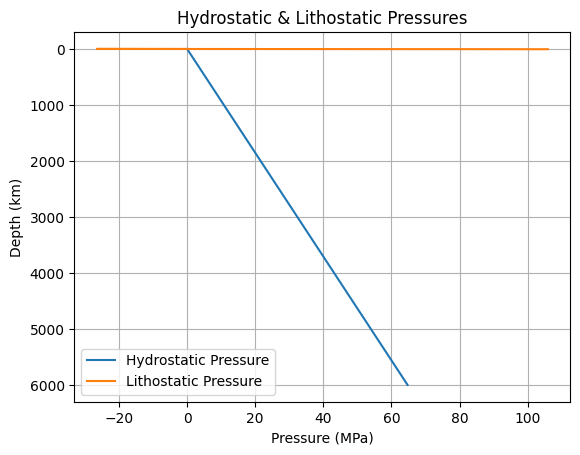

In [82]:
# Offshore plot
ax1 = plt.subplot(1, 1, 1)

plt.plot(pressures_hydrostatic, depths, label='Hydrostatic Pressure')
plt.plot(pressures_lit, layer_depths, label='Lithostatic Pressure')
plt.title('Hydrostatic & Lithostatic Pressures')
plt.ylabel('Depth (km)')
plt.xlabel('Pressure (MPa)')
# plt.xlim(0, 60)
# plt.ylim(-1, 5)
ax1.invert_yaxis()  # Invert the y-axis for offshore plot
plt.legend()
plt.grid(True)


In [ ]:
# Example usage:
# Layer properties
layer_thicknesses = np.array([-1000, 1000, 1000, 1000, 1000, 1000])  # thickness of each layer in meters
rock_densities = np.array([2700, 2700, 2700, 2700, 2700, 2700])  # density of each rock layer in kg/m^3
porosities = np.array([0., 0., 0., 0., 0., 0.])  # porosity of each layer

pressures_lit = lithostatic_pressures(layer_thicknesses, rock_densities, porosities)
layer_depths = np.cumsum(layer_thicknesses/1000)
layer_depths = np.insert(layer_depths, 0, 0)
pressures_lit = np.insert(pressures_lit, 0, 0)

print("Cumulative Pressures Lith:", pressures_lit )


Layer Depths: [-1000     0  1000  2000  3000  4000] Number of Layers: 6
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 0--1000 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: -1000-0 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 0-1000 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 1000-2000 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 2000-3000 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 3000-4000 m
Cumulative Pressures Lith: [  0.    -26.487   0.     26.487  52.974  79.461 105.948]


In [ ]:
# depths = np.linspace(0, 6000, 6)  # 0 to 5 km
# # pressures_hydrostatic = hydrostatic_pressures(depths)
# # depths = depths/1000
# # print("Hydrostatic pressures:", pressures_hydrostatic)

Hydrostatic pressures (MPa): [-10.791, 4.3164, 19.4238, 34.5312, 49.6386, 64.746]
Layer Depths: [-1000     0  1000  2000  3000  4000] Number of Layers: 6
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 0--1000 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: -1000-0 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 0-1000 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 1000-2000 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 2000-3000 m
Effective Density: 2700.0, Porosity: 0.0, Depth Range: 3000-4000 m
Lithostatic pressures (MPa): [  0.    -26.487   0.     26.487  52.974  79.461 105.948]


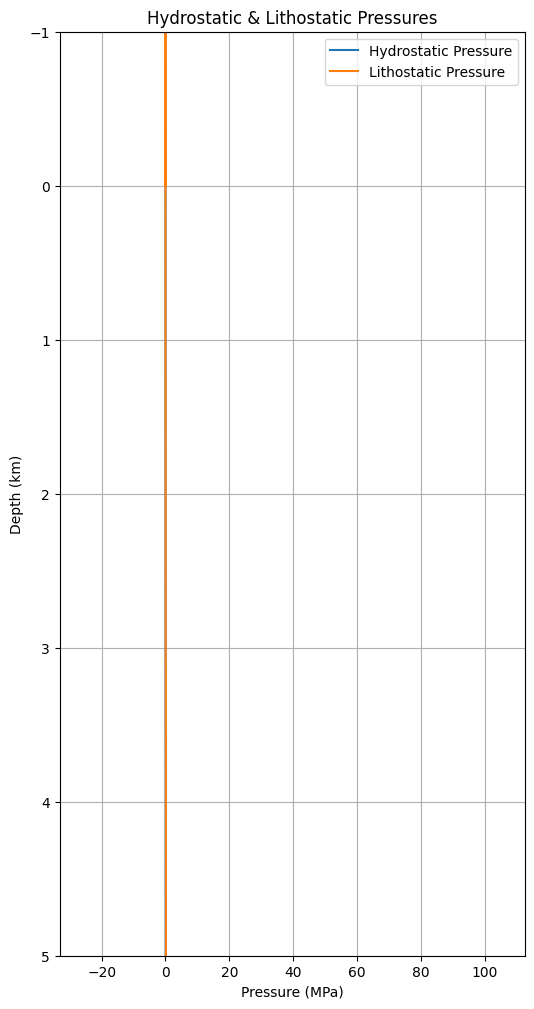

In [ ]:
def pressure(pressure_types):
    # Hydrostatic pressure
    depths = np.linspace(-1000, 6000, 6)

    # Lithostatic pressure
    layer_thicknesses = np.array([-1000, 1000, 1000, 1000, 1000, 1000])  # thickness of each layer in meters
    rock_densities = np.array([2700, 2700, 2700, 2700, 2700, 2700])  # density of each rock layer in kg/m^3
    porosities = np.array([0., 0., 0., 0., 0., 0.])  # porosity of each layer

    if 'hydrostatic' in pressure_types:
        pressures_hydrostatic = hydrostatic_pressures(depths)
        print("Hydrostatic pressures (MPa):", pressures_hydrostatic)

    if 'lithostatic' in pressure_types:
        lith_pressures = lithostatic_pressures(layer_thicknesses, rock_densities, porosities)
        layer_depths = np.cumsum(layer_thicknesses)
        layer_depths = np.insert(layer_depths, 0, 0)
        pressures_lit = np.insert(lith_pressures, 0, 0)
        print("Lithostatic pressures (MPa):", pressures_lit)


      # Plotting
    plt.figure(figsize=(6, 12))

    ax1 = plt.subplot(1, 1, 1)

    plt.plot(pressures_hydrostatic, depths, label='Hydrostatic Pressure')
    plt.plot(pressures_lit, layer_depths, label='Lithostatic Pressure')
    plt.title('Hydrostatic & Lithostatic Pressures')
    plt.ylabel('Depth (km)')
    plt.xlabel('Pressure (MPa)')
    # plt.xlim(0, 60)
    plt.ylim(-1, 5)
    ax1.invert_yaxis()  # Invert the y-axis for offshore plot
    plt.legend()
    plt.grid(True)


pressure(['hydrostatic', 'lithostatic'])

# 2.2.1 Basic Formulation

## Hydrostatic and Lithostatic Pressure, p.38

In [6]:
# Constants
g = 9.81  # gravitational acceleration in m/s^2
rho_sea = 1100  # density of sea water in kg/m^3
rho_w = 1040  # density of pore water in kg/m^3
rho_shale = 2700  # density of shale in kg/m^3
rho_sandstone = 2720  # density of sandstone in kg/m^3
water_depth = 1000  # water depth hw = 1 km in meters

[   0.          666.66666667 1333.33333333 2000.         2666.66666667
 3333.33333333 4000.         4666.66666667 5333.33333333 6000.        ]
Hydrostatic pressures (MPa): [0.0, 6.801599999999998, 13.603199999999996, 20.404799999999998, 27.20639999999999, 34.007999999999996, 40.809599999999996, 47.61119999999998, 54.41279999999998, 61.21439999999998]
1333.3333333333333
10.791
2000.0
10.791
2666.6666666666665
10.791
3333.333333333333
10.791
4000.0
10.791
4666.666666666666
10.791
5333.333333333333
10.791
6000.0
10.791
Lithostatic pressures (MPa): [0.0, 0.0, 19.619999999999997, 37.278, 54.93599999999999, 72.59399999999998, 90.25199999999998, 107.90999999999997, 125.56799999999997, 143.226]


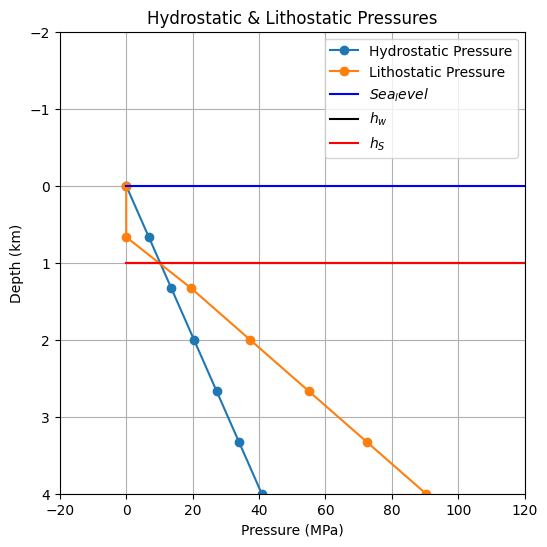

In [131]:
def hydrostatic_pressures(depths, sea_level, sediment_surface, rho_water=1040):
    """
    Calculate cumulative hydrostatic pressures for each layer.

    Parameters:
    - depths: List or array of bottom depth of each layer (m)
    - water_depth: Depth of water (m)
    - sediment_surface: Depth of sediment surface (m)
    - rho_water: Constant value of sea water density (kg/m^3)

    Returns:
    - List of cumulative pressures (MPa) for each layer and depth array
    """

    g = 9.81  # acceleration due to gravity in m/s^2
    # Calculate pressures using numerical integration
    if sea_level > sediment_surface:
      pressures = [quad(lambda z: rho_water * g, sediment_surface, depth)[0] / 1e6 for depth in depths]  # Convert Pa to MPa

    pressures = [quad(lambda z: rho_water * g, sea_level, depth)[0] / 1e6 for depth in depths]  # Convert Pa to MPa

    return pressures




def lithostatic_pressures(layer_bottom_depth, rock_densities, porosities, sea_level,
                          water_depth, sediment_surface):
    """
    Calculate cumulative lithostatic pressures for each layer.

    Parameters:
    - layer_thicknesses: List or array of thicknesses of each layer (m)
    - rock_densities: List or array of densities of each rock layer (kg/m^3)
    - porosities: List or array of porosity values for each layer (fraction)
    - water_depth: Constant value of a water depth (m)

    Returns:
    - List of cumulative pressures (MPa) for each layer
    """
    g = 9.81  # acceleration due to gravity in m/s^2
    rho_sea = 1100
    pressures = []
    total_depth = 0
    total_pressure = 0
    # layer_depths = np.cumsum(layer_thicknesses)
    # print(layer_depths)

    for depth, density, porosity in zip(layer_bottom_depth, rock_densities, porosities):
        total_pressure = 0
        effective_density = density * (1 - porosity) + rho_sea*porosity

        if sea_level > sediment_surface:
          pressure_increment = quad(lambda z: effective_density * g, sediment_surface, depth)[0]
          total_pressure += pressure_increment
          print(sediment_surface, depth)

        # elif sea_level == sediment_surface and water_depth == 0:
        #   pressure_increment = quad(lambda z: effective_density * g, sediment_surface, depth)[0]
        #   total_pressure += pressure_increment

        else:
          if depth > water_depth:
            print(depth)
            water_pressure = rho_sea * g * np.abs(sea_level - water_depth)
            print(water_pressure / 1e6)
            pressure_increment = quad(lambda z: effective_density * g, water_depth, depth)[0]
            total_pressure += water_pressure
            total_pressure += pressure_increment

        pressures.append((total_pressure) / 1e6)  # Convert Pa to MPa

    return pressures


def pressure(pressure_types):

    SEA_LEVEL = 0
    WATER_DEPTH = 1000
    SEDIMENT_SURFACE = 1000

    # # Hydrostatic pressure
    # depths = np.linspace(SEDIMENT_SURFACE, 6000, 6)  # depths in meters

    # Lithostatic pressure
    N = 10
    layer_bottom_depth = np.linspace(0, 6000, N)  # thickness of each layer in meters
    rock_densities = np.full(N, 2700)  # density of each rock layer in kg/m^3
    porosities = np.full(N, 0.0)  # porosity of each layer
    print(layer_bottom_depth)

    # # Lithostatic pressure
    # layer_bottom_depth = np.array([0, 1000, 2000, 3000, 4000, 5000])  # thickness of each layer in meters
    # rock_densities = np.array([2700, 2700, 2700, 2700, 2700, 2700])  # density of each rock layer in kg/m^3
    # porosities = np.array([0., 0., 0., 0., 0., 0.])  # porosity of each layer
    # print(layer_bottom_depth)

    if 'hydrostatic' in pressure_types:
        pressures_hydrostatic = hydrostatic_pressures(layer_bottom_depth,
                                                      sediment_surface = SEDIMENT_SURFACE,
                                                      sea_level=SEA_LEVEL)
        print("Hydrostatic pressures (MPa):", pressures_hydrostatic)

    if 'lithostatic' in pressure_types:
        lith_pressures = lithostatic_pressures(layer_bottom_depth, rock_densities, porosities, sea_level=SEA_LEVEL,
                                               water_depth=WATER_DEPTH, sediment_surface=SEDIMENT_SURFACE)
        print("Lithostatic pressures (MPa):", lith_pressures)
        # layer_depths = np.cumsum(layer_thicknesses)
        # layer_depths = np.insert(layer_depths, 0, 0)
        # pressures_lit = np.insert(lith_pressures, 0, 0)
        # print("Lithostatic pressures (MPa):", pressures_lit)

    # Plotting
    plt.figure(figsize=(6, 6))
    ax1 = plt.subplot(1, 1, 1)

    if 'hydrostatic' in pressure_types:
        plt.plot(pressures_hydrostatic, layer_bottom_depth / 1000, label='Hydrostatic Pressure', marker='o')  # Convert depths to km
    if 'lithostatic' in pressure_types:
        plt.plot(lith_pressures, layer_bottom_depth / 1000, label='Lithostatic Pressure', marker='o')  # Convert layer depths to km

    plt.plot([np.min(pressures_hydrostatic), np.max(lith_pressures)],
     [SEA_LEVEL*1e-3, SEA_LEVEL*1e-3], color='blue', label=f'$Sea_level$') # Sea water level (hw)

    plt.plot([np.min(pressures_hydrostatic), np.max(lith_pressures)],
     [WATER_DEPTH*1e-3, WATER_DEPTH*1e-3], color='black', label=f'$h_w$') # Sea water level (hw)

    plt.plot([np.min(pressures_hydrostatic), np.max(lith_pressures)],
     [SEDIMENT_SURFACE*1e-3, SEDIMENT_SURFACE*1e-3], color='RED', label=f'$h_S$') # Surface level (hs)


    plt.title('Hydrostatic & Lithostatic Pressures')
    plt.ylabel('Depth (km)')
    plt.xlabel('Pressure (MPa)')
    plt.ylim(4, -2)  # Set limits after converting depths to km
    # plt.xlim([np.min(pressures_hydrostatic), np.max(lith_pressures)])
    plt.xlim(-20, 120)
    plt.legend()
    plt.grid(True)
    plt.show()

pressure(['hydrostatic', 'lithostatic'])
# pressure(['hydrostatic'])

## Pore Pressure: Terzaghi Type Models

In [52]:
shale = {
    'porosity initial': 0.70,
    'decline angle': 0.096
}

siltstone = {
    'porosity initial': 0.55,
    'decline angle': 0.049
}

sandstone = {
    'porosity initial': 0.41,
    'decline angle': 0.0266
}

<ipython-input-74-0f82d230ef51>:8: RuntimeWarning: divide by zero encountered in log
  return [- (1 / k) * np.log(phi / phi0) for phi in phi_array]


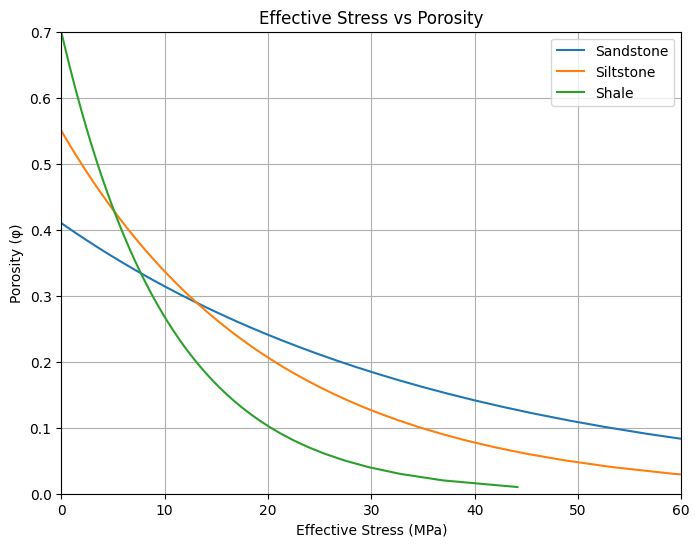

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def arty_model(phi_array, phi0, k):
    if phi0 <= 0 or k <= 0:
        raise ValueError("phi0 and k must be positive values.")

    return [- (1 / k) * np.log(phi / phi0) for phi in phi_array]

# Example lithology data
sandstone = {'porosity initial': 0.41, 'k': 0.0266}
siltstone = {'porosity initial': 0.55, 'k': 0.049}
shale = {'porosity initial': 0.70, 'k': 0.096}

# List of lithology types
lithology_types = ['sandstone', 'siltstone', 'shale']

# Prepare the plot
plt.figure(figsize=(8, 6))
ax1 = plt.subplot(1, 1, 1)

# Porosity array
phi_array = np.linspace(0., 1, 100)  # Start from a small positive value

# Iterate through each lithology type and calculate effective stress
for lithology in lithology_types:
    if lithology == 'sandstone':
        phi0 = sandstone['porosity initial']
        k = sandstone['k']
    elif lithology == 'siltstone':
        phi0 = siltstone['porosity initial']
        k = siltstone['k']
    elif lithology == 'shale':
        phi0 = shale['porosity initial']
        k = shale['k']

    # Calculate effective stress for the current lithology
    sigma_effective = arty_model(phi_array, phi0, k)

    # Plotting effective stress against porosity
    plt.plot(sigma_effective, phi_array, label=f'{lithology.capitalize()}')

# Final plot adjustments
plt.title('Effective Stress vs Porosity')
plt.ylabel('Porosity (φ)')
plt.xlabel('Effective Stress (MPa)')
plt.xlim(0, 60)
plt.ylim(0, 0.7)

# Log scale
# plt.ylim(0.01, 1)
# plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-17-f759760e2184>:8: RuntimeWarning: divide by zero encountered in log
  return [- (1 / k) * np.log(phi / phi0) for phi in phi_array]


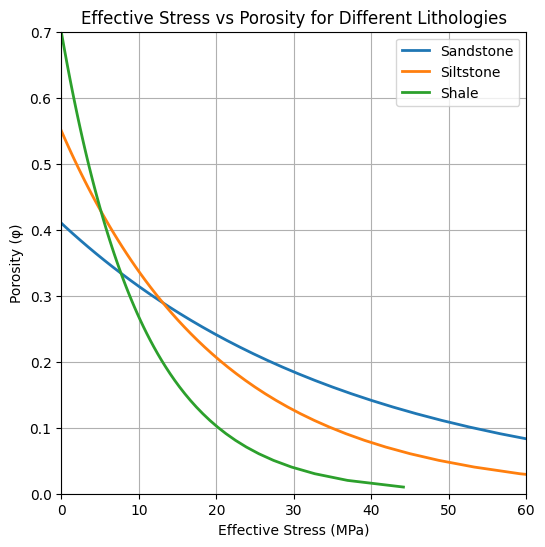

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def arty_model(phi_array, phi0=0.70, k=0.096):
    if phi0 <= 0 or k <= 0:
        raise ValueError("phi0 and k must be positive values.")

    return [- (1 / k) * np.log(phi / phi0) for phi in phi_array]

# Define porosity and decline angle for each lithology
shale = {
    'porosity initial': 0.70,
    'decline angle': 0.096
}

siltstone = {
    'porosity initial': 0.55,
    'decline angle': 0.049
}

sandstone = {
    'porosity initial': 0.41,
    'decline angle': 0.0266
}

lithology_types = ['sandstone', 'siltstone', 'shale']

# Create an array of porosity values
phi_array = np.linspace(0., 1, 100)  # Start from a small positive value

# Initialize the plot
plt.figure(figsize=(6, 6))

# Loop through each lithology type and calculate effective stress
for lithology in lithology_types:
    if lithology == 'sandstone':
        phi0 = sandstone['porosity initial']
        k = sandstone['decline angle']
    elif lithology == 'siltstone':
        phi0 = siltstone['porosity initial']
        k = siltstone['decline angle']
    elif lithology == 'shale':
        phi0 = shale['porosity initial']
        k = shale['decline angle']

    # Calculate effective stress using the arty_model function
    sigma_effective = arty_model(phi_array, phi0=phi0, k=k)

    # Plot the effective stress for the current lithology
    plt.plot(sigma_effective, phi_array, label=f'{lithology.capitalize()}', linewidth=2)

# Customize the plot
plt.title('Effective Stress vs Porosity for Different Lithologies')
plt.ylabel('Porosity (φ)')
plt.xlabel('Effective Stress (MPa)')
plt.grid(True)
plt.xlim(0, 60)
plt.ylim(0, 0.7)
plt.legend()
plt.show()

## Athy Model with Hydrostatic Depth

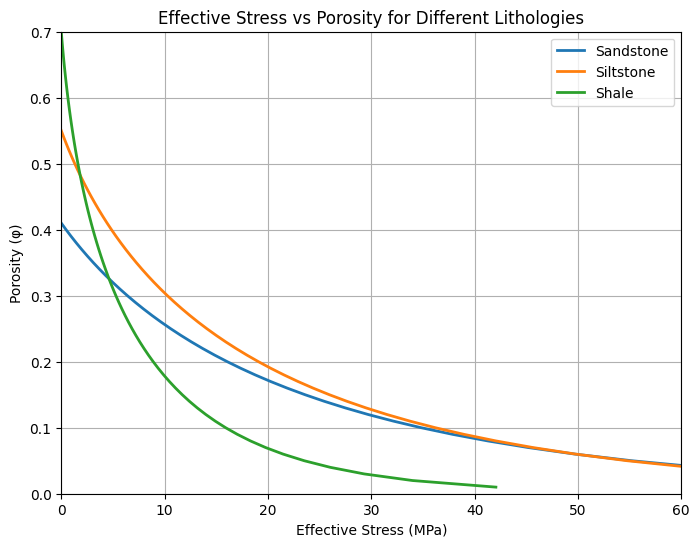

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def effective_stress(phi_array, phi0, k, delta_rho=1.0, g=9.81):
    """Calculate effective stress based on the provided equation."""
    return (delta_rho * g / k) * (phi_array - phi0 - np.log(phi_array / phi0))

def porosity_from_stress(sigma, phi0, k, delta_rho=1.0, g=9.81, initial_guess=0.5, tol=1e-6, max_iter=100):
    """Calculate porosity from effective stress using Newton's method."""
    phi = initial_guess
    for _ in range(max_iter):
        # Calculate effective stress at current porosity
        sigma_current = effective_stress(np.array([phi]), phi0, k, delta_rho, g)[0]

        # Calculate derivative (numerical approximation)
        d_sigma_d_phi = (effective_stress(np.array([phi + tol]), phi0, k, delta_rho, g)[0] - sigma_current) / tol

        # Update porosity using Newton's method
        phi_new = phi - (sigma_current - sigma) / d_sigma_d_phi

        # Check for convergence
        if abs(phi_new - phi) < tol:
            return phi_new

        phi = phi_new

    return phi  # Return last computed value if not converged

# Define lithology properties
shale = {
    'porosity initial': 0.70,
    'decline angle': 0.83
}

siltstone = {
    'porosity initial': 0.55,
    'decline angle': 0.34
}

sandstone = {
    'porosity initial': 0.41,
    'decline angle': 0.31
}

lithology_types = ['sandstone', 'siltstone', 'shale']

# Create an array of porosities
phi_array = np.linspace(0.01, 1, 100)  # Start from a small positive value

plt.figure(figsize=(8, 6))

# Loop through each lithology and calculate effective stress
for lithology in lithology_types:
    if lithology == 'sandstone':
        phi0 = sandstone['porosity initial']
        k = sandstone['decline angle']
    elif lithology == 'siltstone':
        phi0 = siltstone['porosity initial']
        k = siltstone['decline angle']
    elif lithology == 'shale':
        phi0 = shale['porosity initial']
        k = shale['decline angle']

    # Calculate effective stress for the current lithology
    sigma_effective = effective_stress(phi_array, phi0=phi0, k=k)

    # Plot the effective stress for the current lithology
    plt.plot(sigma_effective, phi_array, label=f'{lithology.capitalize()}', linewidth=2)

# Customize the plot
plt.title('Effective Stress vs Porosity for Different Lithologies')
plt.ylabel('Porosity (φ)')
plt.xlabel('Effective Stress (MPa)')
plt.grid(True)
plt.xlim(0, 60)
plt.ylim(0, 0.7)  # Adjusted to cover full range of porosity values
plt.legend()
plt.show()

# Viscosity

## Viscosity (McCain)

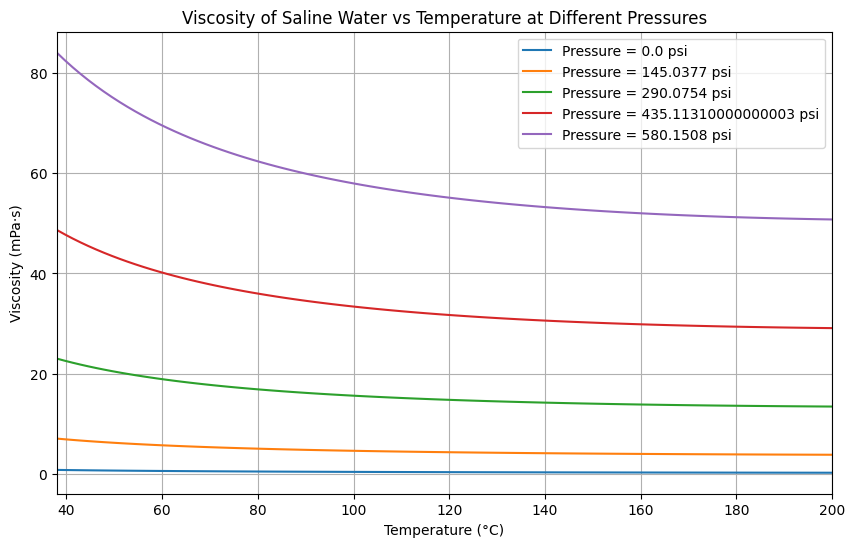

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def viscosity_McCain(s, T, P):
    """
    Calculate viscosity of saline water.

    Parameters:
    - s: Salinity (%), s < 26%
    - T: Temperature (°C), 38 < T < 200
    - P: Pressure (psi), P < 100 MPa

    Returns:
    - Viscosity (mPa·s) depending on temperature
    """
    a = 1.12166 - 2.63951 * 10**-2 * s + 6.79461 * 10**-4 * s**2 + 5.47119 * 10**-5 * s**3 - 1.55586 * 10**-6 * s**4
    vT = T**-a * (109.547 - 8.40564 * s + 0.313314 * s**2 + 8.72213 * 10**-3 * s**3)
    v = vT * (0.9994 + 4.0295 * 10**-5 * P + 3.1062 * 10**-9 * P**2)

    return v


def mp_to_psi(mp):
    """
    Convert pressure from megapascals (MPa) to pounds per square inch (psi).

    Parameters:
    - mp: Pressure in MPa

    Returns:
    - Pressure in psi
    """
    return mp * 145.0377

# Constants
s = 10  # Salinity in %

# Define pressure values in MPa
pressure_mpa = np.array([0, 1, 2, 3, 4])  # Example pressures in MPa
# Convert to psi
pressure_psi = mp_to_psi(pressure_mpa)

# Create an array of temperatures (C) and convert to Fahrenheit
temperature_array_C = np.linspace(38, 200, 100) # Start from 38°C to comply with constraints
temperature_array_F = (temperature_array_C * 9/5) + 32 # Convert to Fahrenheit

# Plotting
plt.figure(figsize=(10, 6))

# Calculate viscosity for each temperature and pressure
for P in pressure_psi :
    viscosity_values = [viscosity_McCain(s=s, T=T, P=P*((T - 32) * (5 / 9) + 273.15)) for T in temperature_array_F]


    # Plot the viscosity for the current pressure
    plt.plot(temperature_array_C, viscosity_values, label=f'Pressure = {P} psi')

# Customize the plot
plt.title('Viscosity of Saline Water vs Temperature at Different Pressures')
plt.ylabel('Viscosity (mPa·s)')
plt.xlabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.xlim(38, 200) # Set limits according to temperature range
plt.show()

## Viscosity (Hewlett-Packard)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def viscosity_HP(s, T, Tk):
    """
    Calculate viscosity of saline water.

    Parameters:
    - s: Salinity (%), s < 26%
    - T: Temperature (°C), 38 < T < 200
    - P: Pressure (psi), P < 100 MPa

    Returns:
    - Viscosity (mPa·s) depending on temperature
    """
    ν = v0 * (1 - 1.87*10**-3*s**(0.5) + 2.18*10**-4*s**2.5 +(T**(0.5) - 0.0135*T)*(2.76*10**-3*s - 3.44*10**(-4)*s**(1.5)))
    v0 = 243.18 * 10**-7 * 10**(247.8/(Tk-140)) * (1 + 1.0467 * 10**-6 * P * (Tk *- 305))

    return v


# Create an array of temperatures (C) and convert to Fahrenheit
temperature_array_C = np.linspace(0, 300, 100) # Start from 38°C to comply with constraints
temperature_array_F = (temperature_array_C * 9/5) + 32 # Convert to Fahrenheit

# Plotting
plt.figure(figsize=(10, 6))

# Calculate viscosity for each temperature and pressure
for P in pressure_psi :
    viscosity_values = [viscosity_HP(s=s, T=T, P=P) for T in temperature_array_F]

    # Plot the viscosity for the current pressure
    plt.plot(temperature_array_C, viscosity_values, label=f'Pressure = {P} psi')

# Customize the plot
plt.title('Viscosity of Saline Water vs Temperature at Different Pressures')
plt.ylabel('Viscosity (mPa·s)')
plt.xlabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.xlim(38, 200) # Set limits according to temperature range
plt.show()



SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (<ipython-input-17-2e8d40ad1226>, line 16)

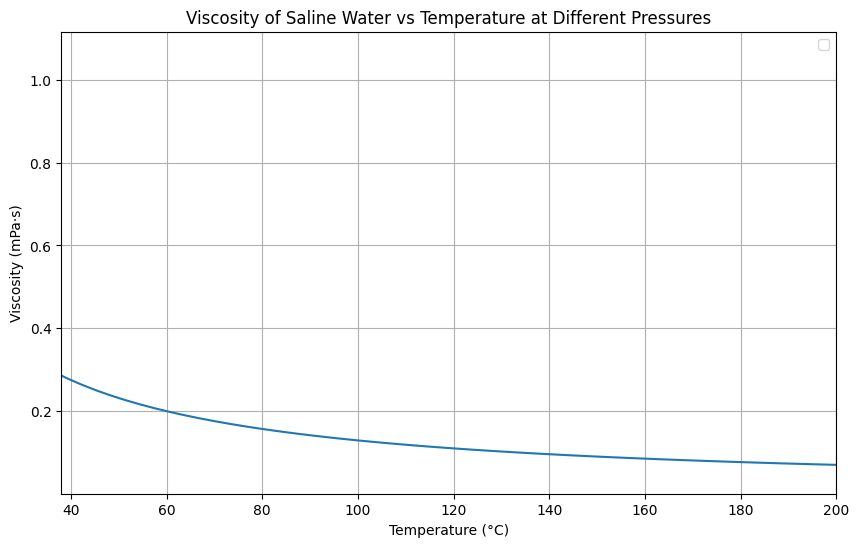

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

def viscosity(T):
    A = (T-150)/100
    viscosity = ((5.38 +3.8*A - 0.026*A**3))**-1
    return viscosity

    # return 109.5*T**(-1.122)


# Create an array of temperatures (C) and convert to Fahrenheit
temperature_array_C = np.linspace(0, 300, 100) # Start from 38°C to comply with constraints
temperature_array_F = (temperature_array_C * 9/5) + 32 # Convert to Fahrenheit

# Plotting
plt.figure(figsize=(10, 6))

viscosity_values = [viscosity(T=T) for T in temperature_array_F]

# Plot the viscosity for the current pressure
plt.plot(temperature_array_C, viscosity_values)


# Customize the plot
plt.title('Viscosity of Saline Water vs Temperature at Different Pressures')
plt.ylabel('Viscosity (mPa·s)')
plt.xlabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.xlim(38, 200) # Set limits according to temperature range
plt.show()


# Permeability

<ipython-input-30-05d4a54471fd>:11: RuntimeWarning: divide by zero encountered in scalar divide
  return 2 * 10**14 * k * (phi**3 / (S**2 * (1 - phi)**2))


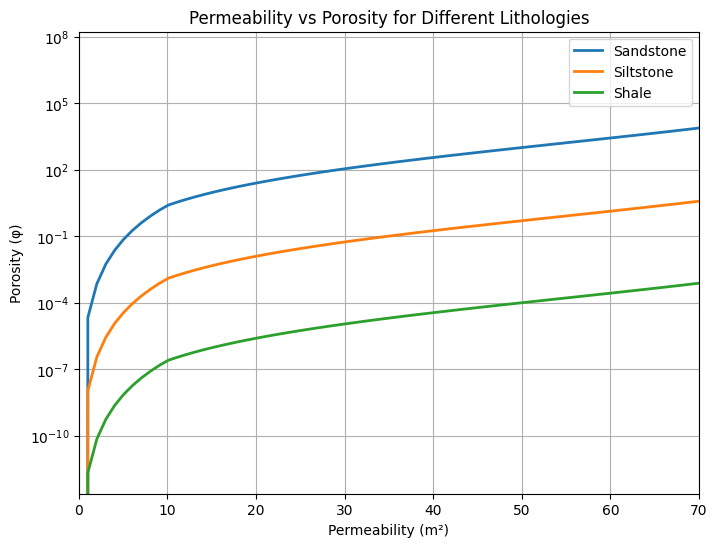

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def Kozeny_Carman(r, phi, tau):
    return r**2 * phi / (8 * tau**2)

def Kozeny_Carman_lithology(phi, k, S):
    if phi < 0.1:
        return 2 * 10**16 * k * (phi**5 / (S**2 * (1 - phi)**2))
    else:
        return 2 * 10**14 * k * (phi**3 / (S**2 * (1 - phi)**2))

# Define lithology properties
shale = {
    'spec. surf. area': 10**8,
    'k': 0.01
}

siltstone = {
    'spec. surf. area': 10**7,
    'k': 0.5
}

sandstone = {
    'spec. surf. area': 10**6,
    'k': 10.0
}

lithology_types = ['sandstone', 'siltstone', 'shale']

# Create an array of porosities
phi_array = np.linspace(0.0, 1, 100)  # Start from a small positive value

plt.figure(figsize=(8, 6))

# Loop through each lithology and calculate effective stress
for lithology in lithology_types:
    if lithology == 'sandstone':
        k = sandstone['k']
        SSA = sandstone['spec. surf. area']
    elif lithology == 'siltstone':
        k = siltstone['k']
        SSA = siltstone['spec. surf. area']
    elif lithology == 'shale':
        k = shale['k']
        SSA = shale['spec. surf. area']

    # Calculate permeability for the current lithology
    permeability = [Kozeny_Carman_lithology(phi, k=k, S=SSA) for phi in phi_array]

    # Plot the permeability for the current lithology
    plt.plot(phi_array*100, permeability, label=f'{lithology.capitalize()}', linewidth=2)

# Customize the plot
plt.title('Permeability vs Porosity for Different Lithologies')
plt.ylabel('Porosity (φ)')
plt.xlabel('Permeability (m²)')
plt.grid(True)
plt.xlim(0, 70)

# Set y-axis to logarithmic scale
plt.yscale('log')

plt.legend()
plt.show()

In [ ]:
# Given pressures
hydrostatic_pressures = [10.202399999999999, 20.404799999999998, 30.60719999999999,
                          40.809599999999996, 51.01199999999999, 61.21439999999998]

lithostatic_pressures = [26.486999999999995, 52.97399999999999, 79.46099999999998,
                         105.94799999999998, 132.43499999999997, 158.92199999999997]

# Calculate differences
pressure_differences = [litho - hydro for litho, hydro in zip(lithostatic_pressures, hydrostatic_pressures)]

# Display the results
print("Pressure Differences (Lithostatic - Hydrostatic):")
print(pressure_differences)

Pressure Differences (Lithostatic - Hydrostatic):
[16.284599999999998, 32.569199999999995, 48.85379999999999, 65.13839999999999, 81.42299999999997, 97.70759999999999]


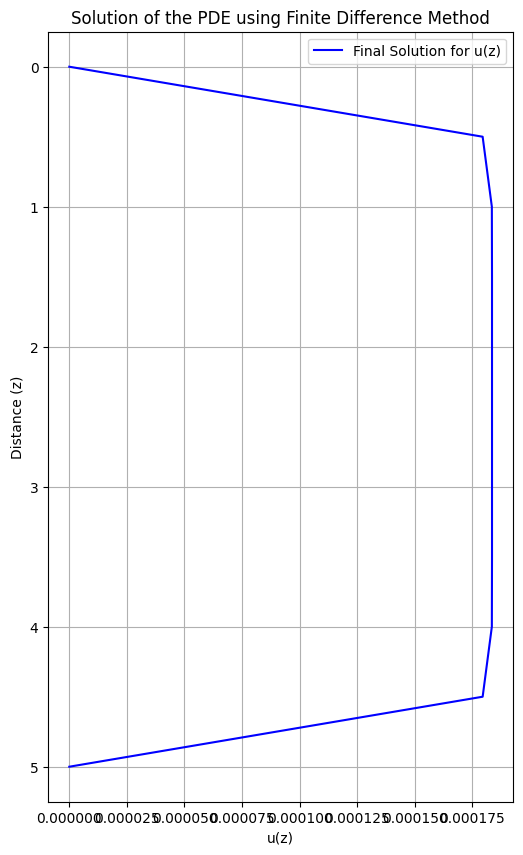

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
C = 10**-4       # Constant C
k = 10           # Permeability k
nu = pressure_differences        # Viscosity nu
L = 5            # Length of the domain in z (km)
T = 10           # Total time (seconds)
dz = 0.5         # Spatial step size (km)
dt = 0.01        # Time step size (seconds)

# Derived parameters
z_points = int(L / dz) + 1
t_points = int(T / dt) + 1

# Initialize arrays
u = np.zeros(z_points)        # Solution array for u
u_l = np.zeros(t_points)      # Assume some known function for u_l

# Example: Define u_l as a function of time (could be any function)
for t in range(t_points):
    u_l[t] = np.sin(t * dt)  # Example: sinusoidal variation

# Time-stepping loop
for t in range(1, t_points):
    for z in range(1, z_points - 1):
        du_dt = (k / nu) * (u[z + 1] - 2 * u[z] + u[z - 1]) / (dz**2)  # Central difference in space
        u[z] += dt * (C * du_dt + C * (u_l[t] - u[z]))  # Update rule based on the equation

# Plotting the results
z_array = np.linspace(0, L, z_points)
plt.figure(figsize=(6, 10))
plt.plot(u, z_array, label='Final Solution for u(z)', color='blue')
plt.title('Solution of the PDE using Finite Difference Method')
plt.ylabel('Distance (z)')
plt.xlabel('u(z)')
plt.grid(True)
plt.legend()

# Invert y-axis
plt.gca().invert_yaxis()

plt.show()

[0. 1. 2. 3. 4. 5. 6.]
[ 0.         -0.181962   -0.30858067 -0.36976802 -0.36736012 -0.2789815
  0.        ]


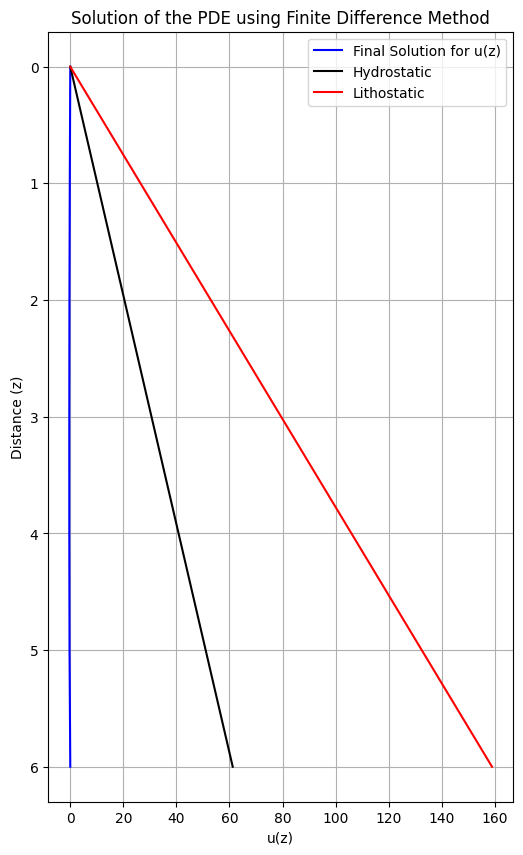

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given pressures (example values for hydrostatic and lithostatic)
hydrostatic_pressures = [0, 10.2024, 20.4048, 30.6072, 40.8096, 51.0120, 61.2144]
lithostatic_pressures = [0, 26.4870, 52.9740, 79.4610, 105.9480, 132.4350, 158.9220]

# Calculate pressure differences
pressure_differences = [litho - hydro for litho, hydro in zip(lithostatic_pressures, hydrostatic_pressures)]

# Parameters
C = 10       # Constant C
k = 100           # Permeability k
L = 6            # Length of the domain in z (km) - adjusted to match depth range
T = 10           # Total time (seconds)
dz = 1           # Spatial step size (km)
dt = 0.01        # Time step size (seconds)

# Derived parameters
z_points = int(L / dz) + 1
t_points = int(T / dt) + 1

# Initialize arrays
u = np.zeros(z_points)        # Solution array for u
u_l = np.zeros(t_points)      # Assume some known function for u_l

# Example: Define u_l as a function of time (could be any function)
for t in range(t_points):
    u_l[t] = np.sin(t * dt)  # Example: sinusoidal variation

# Time-stepping loop
for t in range(1, t_points):
    for z in range(1, z_points - 1):
        # Use pressure difference corresponding to current depth z
        nu = pressure_differences[z] if z < len(pressure_differences) else pressure_differences[-1]

        du_dt = (k / nu) * (u[z + 1] - 2 * u[z] + u[z - 1]) / (dz**2)  # Central difference in space
        u[z] += dt * (C * du_dt + C * (u_l[t] - u[z]))  # Update rule based on the equation

# Plotting the results
z_array = np.linspace(0, L, z_points)
print(z_array)
print(u)
plt.figure(figsize=(6, 10))
plt.plot(u, z_array, label='Final Solution for u(z)', color='blue')
plt.plot(hydrostatic_pressures, z_array, label='Hydrostatic', color='black')
plt.plot(lithostatic_pressures, z_array, label='Lithostatic', color='red')
plt.title('Solution of the PDE using Finite Difference Method')
plt.ylabel('Distance (z)')
plt.xlabel('u(z)')
plt.grid(True)
plt.legend()

# Invert y-axis
plt.gca().invert_yaxis()

plt.show()

[0. 1. 2. 3. 4. 5. 6.]
[ 0.         -0.19123431 -0.32231174 -0.38458097 -0.38215027 -0.2921432
  0.        ]


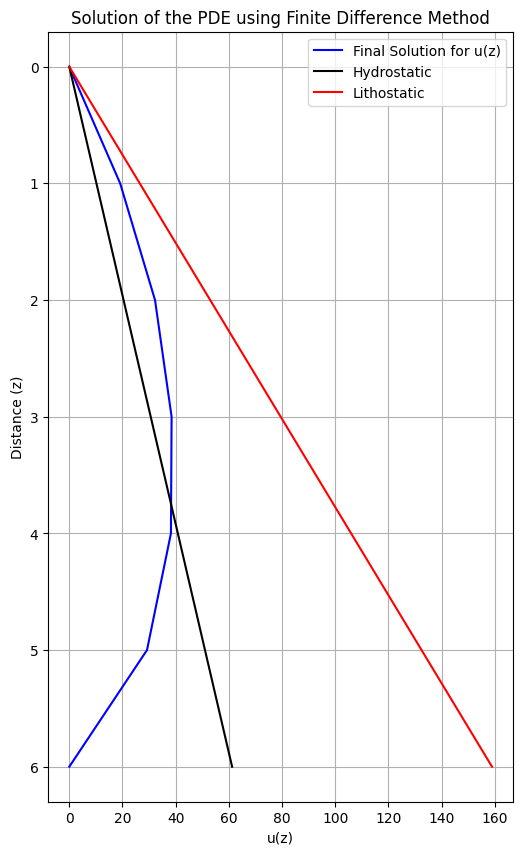

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given pressures (example values for hydrostatic and lithostatic)
hydrostatic_pressures = [0, 10.2024, 20.4048, 30.6072, 40.8096, 51.0120, 61.2144]
lithostatic_pressures = [0, 26.4870, 52.9740, 79.4610, 105.9480, 132.4350, 158.9220]

# Calculate pressure differences
pressure_differences = [litho - hydro for litho, hydro in zip(lithostatic_pressures, hydrostatic_pressures)]

# Parameters
C = 10       # Constant C
k = 100      # Permeability k
L = 6        # Length of the domain in z (km)
T = 10       # Total time (seconds)
dz = 1       # Spatial step size (km)
dt = 0.01    # Time step size (seconds)

# Derived parameters
z_points = int(L / dz) + 1
t_points = int(T / dt) + 1

# Initialize arrays
u = np.zeros(z_points)        # Solution array for u
u_l = np.zeros(t_points)      # Assume some known function for u_l

# Example: Define u_l as a function of time (could be any function)
for t in range(t_points):
    u_l[t] = np.sin(t * dt)  # Example: sinusoidal variation

# Define porosity as a function of depth (example values)
phi = np.linspace(0.1, 0.1, z_points)  # Porosity values from 0.1 to 0.4

# Time-stepping loop
for t in range(1, t_points):
    for z in range(1, z_points - 1):
        # Calculate effective viscosity based on porosity
        nu_eff = pressure_differences[z] / (1 - phi[z]) if phi[z] < 1 else pressure_differences[z]

        du_dt = (k / nu_eff) * (u[z + 1] - 2 * u[z] + u[z - 1]) / (dz**2)  # Central difference in space
        u[z] += dt * (C / (1 - phi[z]) * du_dt + C / (1 - phi[z]) * (u_l[t] - u[z]))  # Update rule based on the equation

# Plotting the results
z_array = np.linspace(0, L, z_points)
print(z_array)
print(u)

u = -u*10**2
plt.figure(figsize=(6, 10))
plt.plot(u, z_array, label='Final Solution for u(z)', color='blue')
plt.plot(hydrostatic_pressures, z_array, label='Hydrostatic', color='black')
plt.plot(lithostatic_pressures, z_array, label='Lithostatic', color='red')
plt.title('Solution of the PDE using Finite Difference Method')
plt.ylabel('Distance (z)')
plt.xlabel('u(z)')
plt.grid(True)
plt.legend()

# Invert y-axis
plt.gca().invert_yaxis()

plt.show()

<ipython-input-67-ef373ea2941b>:45: RuntimeWarning: overflow encountered in scalar multiply
  P[z] += dt * (C / (1 - phi[z]) * dP_dt + C / (1 - phi[z]) * (P_l[t] - P[z]))
<ipython-input-67-ef373ea2941b>:42: RuntimeWarning: invalid value encountered in scalar add
  dP_dt = (k / nu_eff) * (P[z + 1] - 2 * P[z] + P[z - 1]) / (dz**2)
<ipython-input-67-ef373ea2941b>:42: RuntimeWarning: invalid value encountered in scalar subtract
  dP_dt = (k / nu_eff) * (P[z + 1] - 2 * P[z] + P[z - 1]) / (dz**2)


[ 0. nan nan nan nan nan  0.]


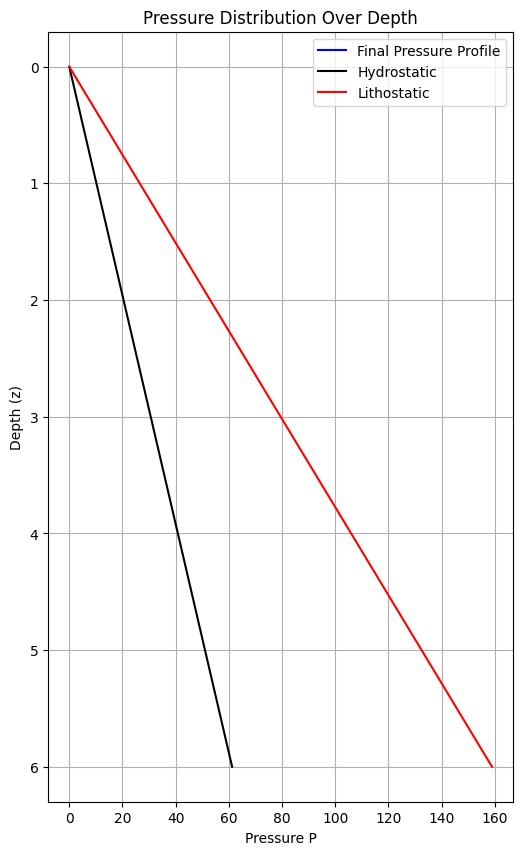

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given pressures (example values for hydrostatic and lithostatic)
hydrostatic_pressures = [0, 10.2024, 20.4048, 30.6072, 40.8096, 51.0120, 61.2144]
lithostatic_pressures = [0, 26.4870, 52.9740, 79.4610, 105.9480, 132.4350, 158.9220]

# Calculate pressure differences
pressure_differences = [litho - hydro for litho, hydro in zip(lithostatic_pressures, hydrostatic_pressures)]

# Parameters
C = 10       # Constant C
k = 100      # Permeability k
nu = 1.0     # Viscosity nu
L = 6        # Length of the domain in z (km)
T = 10       # Total time (seconds)
dz = 1       # Spatial step size (km)
dt = 0.01    # Time step size (seconds)

# Derived parameters
z_points = int(L / dz) + 1
t_points = int(T / dt) + 1

# Initialize arrays
P = np.zeros(z_points)        # Solution array for pressure P
P_l = np.zeros(t_points)      # Assume some known function for Pl

# Set P_l equal to pressure differences over time
for t in range(t_points):
    P_l[t] = pressure_differences[min(t, len(pressure_differences)-1)]  # Use last value if t exceeds length

# Define porosity as a function of depth (example values)
phi = np.linspace(0.1, 0.1, z_points)  # Porosity values from 0.1 to 0.4

# Time-stepping loop
for t in range(1, t_points):
    for z in range(1, z_points - 1):
        # Calculate effective viscosity based on porosity
        nu_eff = nu / (1 - phi[z]) if phi[z] < 1 else nu

        # Central difference in space and time
        dP_dt = (k / nu_eff) * (P[z + 1] - 2 * P[z] + P[z - 1]) / (dz**2)

        # Update rule based on the equation
        P[z] += dt * (C / (1 - phi[z]) * dP_dt + C / (1 - phi[z]) * (P_l[t] - P[z]))

# Plotting the results
z_array = np.linspace(0, L, z_points)
print(P)
plt.figure(figsize=(6, 10))
plt.plot(P, z_array, label='Final Pressure Profile', color='blue')
plt.plot(hydrostatic_pressures, z_array[:len(hydrostatic_pressures)], label='Hydrostatic', color='black')
plt.plot(lithostatic_pressures, z_array[:len(lithostatic_pressures)], label='Lithostatic', color='red')
plt.title('Pressure Distribution Over Depth')
plt.ylabel('Depth (z)')
plt.xlabel('Pressure P')
plt.grid(True)
plt.legend()

# Invert y-axis for depth representation
plt.gca().invert_yaxis()

plt.show()